# BItcoin Historical Data Analysis

### TODO - Analizirati podatke, napraviti grafove 
### O datasetu
####   - Izvor Kaggle
####   - Sadrzi istorijske podate bitcoina
####   - Moze se koristiti za uvid istorijskih cena bitcoina

### Preuzimanje podataka s kaggle sajta

### O podacima u tabeli - https://www.kaggle.com/mczielinski/bitcoin-historical-data
  - Timestamp - Start time of time window (60s window), in Unix time
  - Open - Open price at start time window
  - High - High price within time window
  - Low - Low price within time window
  - Close - Close price at end of time window
  - Volume_(BTC) - Volume of BTC transacted in this window
  - Volume_(Currency) - Volume of corresponding currency transacted in this window
  - Weighted_Price - VWAP- Volume Weighted Average Price

In [1]:
pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url='https://www.kaggle.com/mczielinski/bitcoin-historical-data'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: salexdxd
Your Kaggle Key: ··········


100%|██████████| 100M/100M [00:00<00:00, 113MB/s] 


In [3]:
data_filename = './bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv'

###Pripremanje podataka i ciscenje

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(data_filename)

In [6]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


Broj podataka koji nedostaju

In [7]:
missing_value_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
miss = missing_value_percentages[missing_value_percentages != 0]

Nedostaje >25% podataka

In [8]:
missing_value_percentages

Weighted_Price       0.256025
Volume_(Currency)    0.256025
Volume_(BTC)         0.256025
Close                0.256025
Low                  0.256025
High                 0.256025
Open                 0.256025
Timestamp            0.000000
dtype: float64

In [9]:
miss

Weighted_Price       0.256025
Volume_(Currency)    0.256025
Volume_(BTC)         0.256025
Close                0.256025
Low                  0.256025
High                 0.256025
Open                 0.256025
dtype: float64

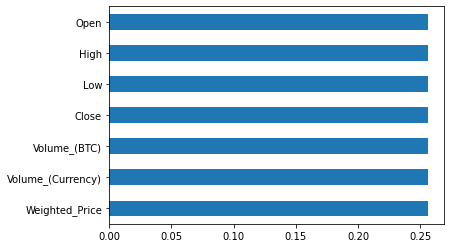

In [10]:
miss.plot(kind='barh')

In [11]:
checknan = df.isnull().values.any()
checknan

True

In [12]:
df_fix = df.dropna(how='any')
df_fix

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [13]:
checknan2 = df_fix.Timestamp.isna().values.any()
checknan2

False

In [14]:
len(df_fix.High)

3613769

In [15]:
from datetime import datetime as dt

In [16]:
import matplotlib.pyplot as plt

In [17]:
import numpy as np

In [18]:
df_date = pd.to_datetime(df_fix.Timestamp, unit='s').dt.date
df_date = df_date[df_date != 0]
df_fix.Timestamp = df_date
df_fix

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [19]:
len(df_fix.Timestamp)

3613769

In [20]:
len(df_fix.Open)

3613769

In [21]:
df_fix.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


# Vizualizacija podataka

In [23]:
import seaborn as sns
sns.set_style("darkgrid")

In [24]:
pip install mplfinance --upgrade --quiet

     |████████████████████████████████| 62 kB 677 kB/s 


In [25]:
import mplfinance as mpf
%matplotlib inline

In [26]:
df_fix.set_index('Timestamp', inplace=True)

In [27]:
df_fix.index = pd.to_datetime(df_fix.index)
df_fix.index

DatetimeIndex(['2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-02',
               '2012-01-03', '2012-01-03',
               ...
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Timestamp', length=3613769, freq=None)

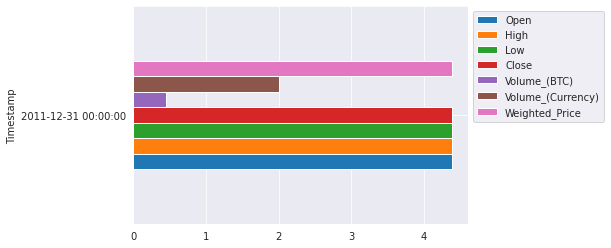

In [28]:
df_fix[:1].plot(kind='barh').legend(loc=0, bbox_to_anchor=(1.0, 1.0))

In [29]:
type(df_fix.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [30]:
df_fix.loc[:]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...
2021-03-30,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [31]:
df_fix

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...
2021-03-30,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [32]:
highest_price_date = df_fix.loc[:, ['High']].sort_values(by='High', ascending=False)
highest_price_date

,High
Timestamp,
2021-03-13,61781.83
2021-03-13,61781.80
2021-03-13,61750.00
2021-03-13,61747.76
2021-03-13,61714.48
...,...
2012-02-16,4.15
2012-02-18,4.14
2012-02-18,4.14


d.plotting.register_matplotlib_converters()

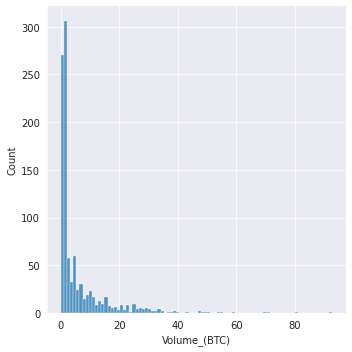

In [33]:
var_btc= df_fix['Volume_(BTC)']
sns.displot(var_btc[:1000])

#### mathplot grid price vs date

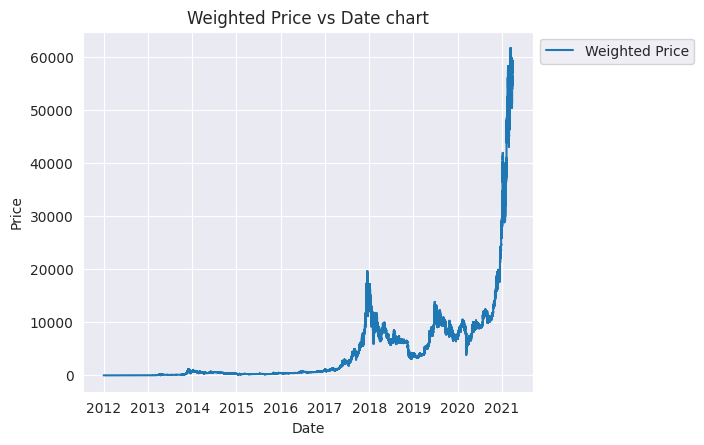

In [34]:
fig_pd = plt.figure(figsize=(5,4), dpi=100)
axes_pd = fig_pd.add_axes([0.1,0.1,0.9,0.9])

axes_pd.plot(df_fix.index, df_fix['Weighted_Price'].astype(int), label = 'Weighted Price')

axes_pd.set_xlabel('Date')
axes_pd.set_ylabel('Price')
axes_pd.set_title('Weighted Price vs Date chart')
lines, labels = axes_pd.get_legend_handles_labels()

axes_pd.legend(lines, labels, bbox_to_anchor=(1.0, 1.0), loc=0)
plt.show()

In [35]:
df_fix.Weighted_Price = df_fix.Weighted_Price.round(2)
df_fix['Volume_(Currency)'].sort_values(ascending=False).astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Timestamp
2021-01-10    13900672
2021-01-04    11629357
2021-02-15    11492484
2021-02-16    10910999
2021-02-22    10633100
                ...   
2013-06-06           0
2013-07-04           0
2013-06-27           0
2014-01-09           0
2017-08-14           0
Name: Volume_(Currency), Length: 3613769, dtype: int64

In [36]:
pip install mplfinance --upgrade --quiet

In [37]:
df_new = pd.to_datetime(df_fix.index)
df_new

DatetimeIndex(['2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-02',
               '2012-01-03', '2012-01-03',
               ...
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Timestamp', length=3613769, freq=None)

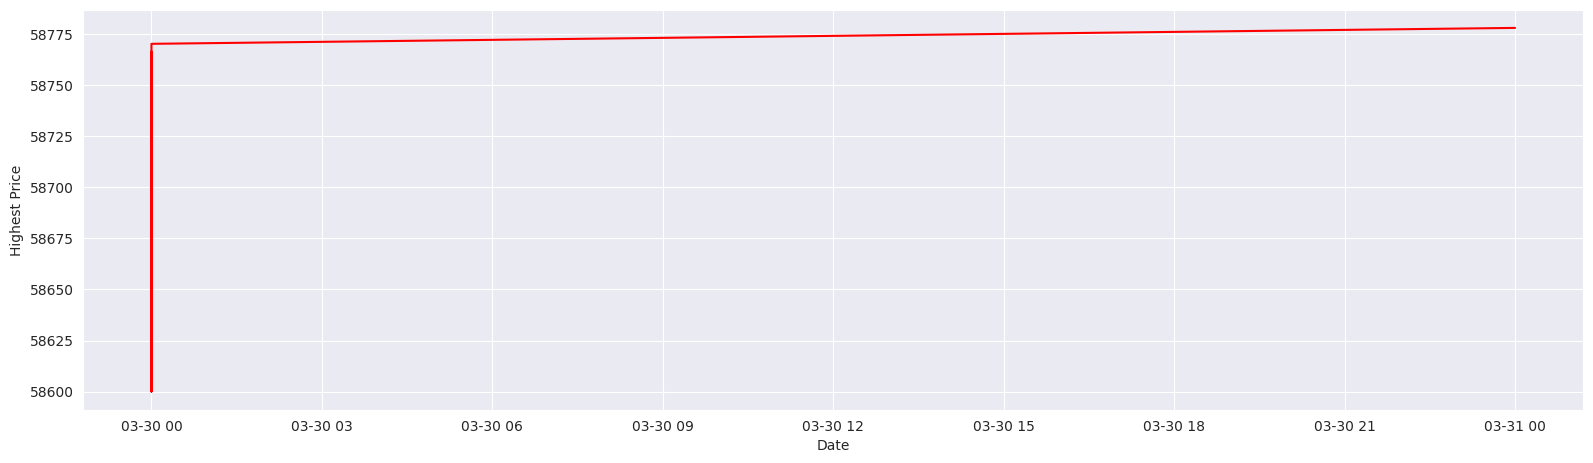

In [38]:
fig_avg = plt.figure(figsize=(5,4), dpi=100)
axes_avg = fig_avg.add_axes([0.1,0.1,3,1])
axes_avg.set_xlabel('Date')
axes_avg.set_ylabel('Highest Price')
axes_avg.plot(df_fix.index[-50:], df_fix['High'][-50:], color='red')

In [39]:
df_fix.index[-50:]

DatetimeIndex(['2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Timestamp', freq=None)

In [40]:
df_fix

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31,4.39,4.39,4.39,4.39,48.000000,210.720000,4.39
2011-12-31,4.50,4.57,4.50,4.57,37.862297,171.380338,4.53
2011-12-31,4.58,4.58,4.58,4.58,9.000000,41.220000,4.58
2012-01-01,4.58,4.58,4.58,4.58,1.502000,6.879160,4.58
...,...,...,...,...,...,...,...
2021-03-30,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.75
2021-03-30,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.23
2021-03-30,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.20


Chart cene u odnosu na kolicinu btc

In [41]:
df_fix.index

DatetimeIndex(['2011-12-31', '2011-12-31', '2011-12-31', '2011-12-31',
               '2012-01-01', '2012-01-01', '2012-01-01', '2012-01-02',
               '2012-01-03', '2012-01-03',
               ...
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-30', '2021-03-30', '2021-03-30',
               '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', name='Timestamp', length=3613769, freq=None)

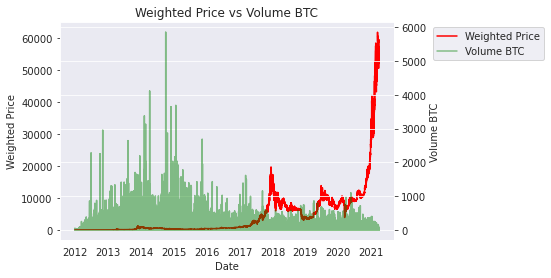

In [42]:
fig = plt.figure()
ax= fig.add_subplot()
ax2=ax.twinx()

ax.plot(df_fix.index, df_fix['Weighted_Price'], color='red', label='Weighted Price')
ax2.plot(df_fix.index, df_fix['Volume_(BTC)'], 'g-', label='Volume BTC', alpha=0.45)
ax.set_xlabel('Date')
ax.set_ylabel('Weighted Price')
ax.set_title('Weighted Price vs Volume BTC')
ax2.set_xlabel('')
ax2.set_ylabel('Volume BTC')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

ax.legend(lines + lines2, labels + labels2, bbox_to_anchor=(1.1, 1.0), loc=0)
ax.grid()
plt.show()

weekly resample

In [43]:
week = df_fix.resample('W').agg({'Open': 'mean',
                          'Close':'mean', 
                          'High': 'max', 
                          'Low': 'min', 
                          'Volume_(BTC)':'sum',
                          })
week

,Open,Close,High,Low,Volume_(BTC)
Timestamp,,,,,
2012-01-01,4.611429,4.621429,5.00,4.39,116.919878
2012-01-08,6.009286,6.017321,7.00,4.93,348.298975
2012-01-15,6.847168,6.845145,7.38,6.23,399.325314
2012-01-22,6.332981,6.332019,7.10,5.52,731.836776
2012-01-29,6.124828,6.125431,6.86,3.80,393.194037
...,...,...,...,...,...
2021-03-07,48913.831560,48915.008325,52652.82,45020.25,35430.404648
2021-03-14,56070.912525,56071.977534,61781.83,49316.98,38099.486052
2021-03-21,57409.002829,57410.340495,60595.13,53221.00,36350.207453


chart cene za godine 2018 do 2021 - nedeljni resample

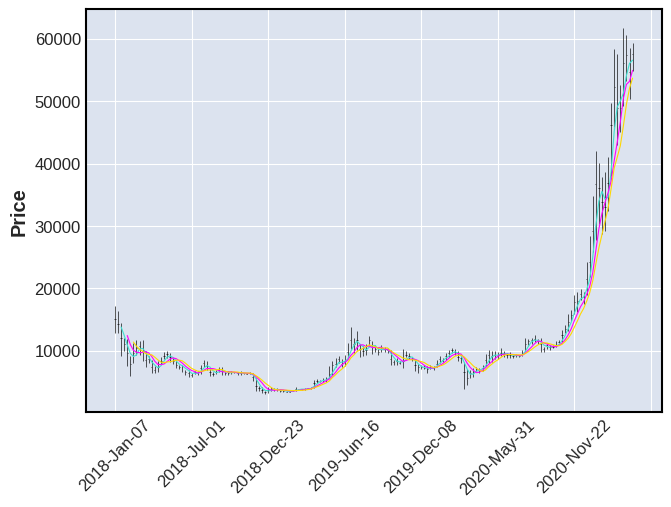

In [44]:
mpf.plot(week['2018':'2021'], type='candle', mav=(3,5,7))

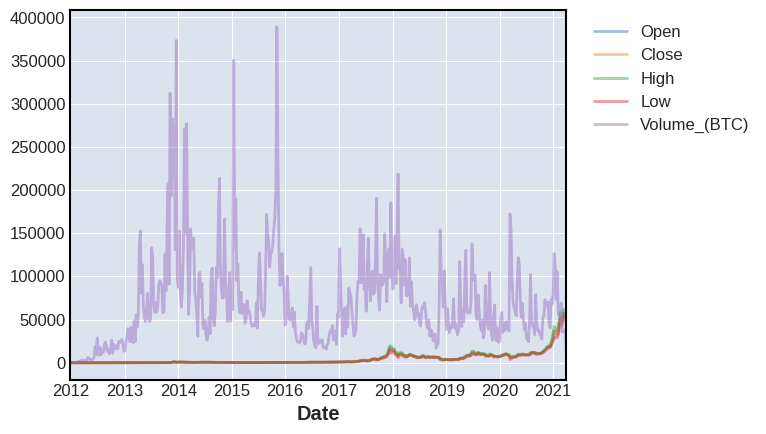

In [45]:
fig = plt.figure()
ax= fig.add_subplot()

week.plot(ax=ax, alpha=0.45)
ax.set_xlabel('Date')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, bbox_to_anchor=(1.4, 1.0), loc=0)

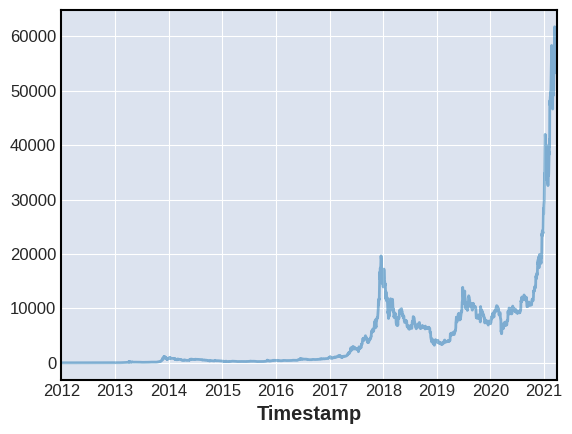

In [46]:
highs = df_fix['High'].resample('D').max()

highs.plot(alpha=0.5)